In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

from COVIDScenarioPipeline.SEIR.utils import config

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')



In [6]:
folder = [x for x in Path('model_output/seir/minimal/').glob('*') if not x.is_file()]

all_seir_sim_cumI = {}
all_seir_sim_diffI = {}

max_files = 100

for fold in folder:
    if ('importation' not in str(fold)):
        data_cumI = []
        data_diffI = []
        print(f'loading {str(fold)[13:]} ... ', end = '')
        files_loaded = 0
                
        for filename in Path(str(fold)).rglob('*.parquet'):
            if files_loaded < max_files:
                sim = pq.read_table(filename).to_pandas()
                sim_c = sim[sim['comp']=='cumI']
                sim_c.drop('comp', axis =1, inplace=True)
                sim_c.set_index('time', inplace = True)
                sim_c = sim_c.sum(axis = 1)
                
                sim_d = sim[sim['comp']=='diffI']
                sim_d.drop('comp', axis =1, inplace=True)
                sim_d.set_index('time', inplace = True)
                sim_d = sim_d.sum(axis = 1)
                
                data_cumI.append(sim_c)
                data_diffI.append(sim_d)
                files_loaded += 1

        data_cumI = pd.concat(data_cumI,axis=1)
        print(f'... {len(data_cumI.columns)} loaded')
        data_diffI = pd.concat(data_diffI,axis=1)
        all_seir_sim_cumI[str(fold)[13:]] = data_cumI
        all_seir_sim_diffI[str(fold)[13:]] = data_diffI

loading seir/minimal/None ... ... 15 loaded


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


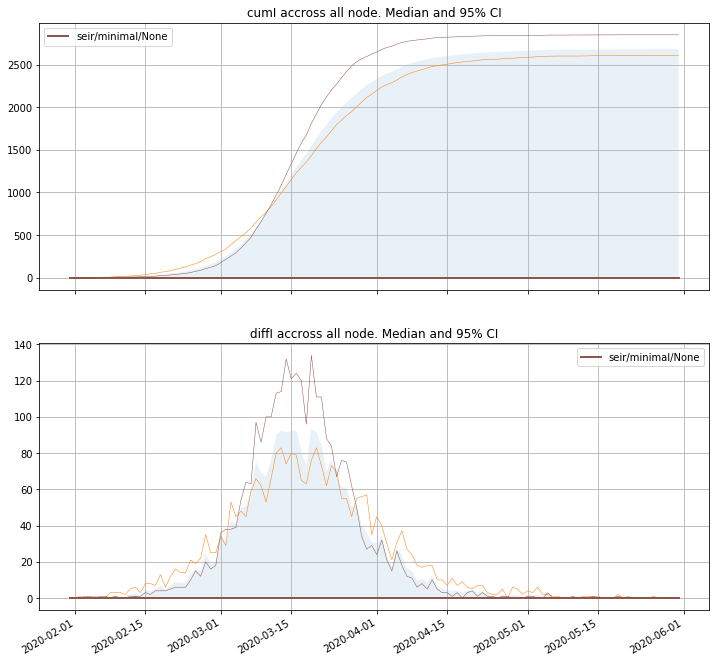

In [13]:
fig, axes = plt.subplots(2,1, figsize =(12,12), sharex=True)


for key, value in all_seir_sim_cumI.items():
    axes[0].plot(value, linewidth = .5)
    axes[0].plot(value.quantile(.5, axis = 1), label = key, linewidth = 2)
    axes[0].fill_between(value.index, value.quantile(.05, axis = 1), 
                      value.quantile(.95, axis = 1), alpha =.1 )

axes[0].legend()
axes[0].grid()
axes[0].set_title(f'cumI accross all node. Median and 95% CI')

for key, value in all_seir_sim_diffI.items():
    axes[1].plot(value, linewidth = .5)
    axes[1].plot(value.quantile(.5, axis = 1), label = key, linewidth = 2)
    axes[1].fill_between(value.index, value.quantile(.05, axis = 1), 
                      value.quantile(.95, axis = 1), alpha =.1 )

axes[1].legend()
axes[1].grid()
axes[1].set_title(f'diffI accross all node. Median and 95% CI')
fig.autofmt_xdate()


In [10]:
all_seir_sim_cumI

{'seir/minimal/None':               0       1    2    3    4       5    6    7    8    9   10   11  \
 time                                                                           
 2020-01-31  0.0     0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-02-01  0.0     0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-02-02  0.0     1.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-02-03  0.0     1.0  0.0  0.0  0.0     2.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-02-04  0.0     1.0  0.0  0.0  0.0     3.0  0.0  0.0  0.0  0.0  0.0  0.0   
 ...         ...     ...  ...  ...  ...     ...  ...  ...  ...  ...  ...  ...   
 2020-05-27  1.0  2608.0  0.0  0.0  0.0  2849.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-05-28  1.0  2608.0  0.0  0.0  0.0  2849.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-05-29  1.0  2608.0  0.0  0.0  0.0  2849.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-05-30  1.0  2608.0  0.0  0.0  0.0  2849.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2020-0